Insurance Dataset:
    
    1) Train_Claim.csv
    
    2) Train_Demographics.csv
    
    3) Train_Policy.csv
    
    4) Train_Vehicle.csv
    
    5) Traindata_with_Target.csv



------> 1) Train_Claim.csv



CustomerID: This column likely contains a unique identifier for the customer who made the claim. 

DateOfIncident: This column stores the date on which the incident occurred. 

TypeOfIncident: This column indicates the type of incident that occurred, such as a collision, theft, or vandalism. 

TypeOfCollission: This column is likely specific to collisions and describes the type of collision that occurred, such as rear-end, head-on, or side-swipe. 

SeverityOfIncident: This column likely rates the severity of the incident on a scale, such as a numerical or categorical scale. 

AuthoritiesContacted: This column indicates whether any authorities, such as the police or fire department, were contacted at the time of the incident. 

IncidentState: This column stores the state in which the incident occurred. 

IncidentCity: This column stores the city in which the incident occurred. 

IncidentAddress: This column stores the address where the incident occurred. 

IncidentTime: This column stores the time at which the incident occurred. 

NumberOfVehicles: This column indicates the number of vehicles involved in the incident. 

PropertyDamage: This column indicates whether there was any property damage resulting from the incident. 

BodilyInjuries: This column indicates whether there were any bodily injuries resulting from the incident. 

Witnesses: This column indicates whether there were any witnesses to the incident. 

PoliceReport: This column indicates whether a police report was filed for the incident. 

AmountOfTotalClaim: This column stores the total amount of the claim made by the customer. This amount includes the amounts for injury, property damage, and vehicle damage, if applicable.

AmountOfInjuryClaim: This column stores the amount claimed by the customer for bodily injuries resulting from the incident.

AmountOfPropertyClaim: This column stores the amount claimed by the customer for property damage resulting from the incident.

AmountOfVehicleDamage: This column stores the amount claimed by the customer for vehicle damage resulting from the incident.
    
    
------> 2) Train_Demographics.csv



CustomerID: This is a unique identifier for each customer in the dataset

InsuredAge: This column contains the age of each customer in years. 
    
InsuredZipCode: This column contains the zip code of the area where each customer lives.
    
InsuredGender: This column contains the gender of each customer, which can be either male or female.
    
InsuredEducationLevel: This column contains the education level of each customer, which can range from high school diploma to advanced degrees. 
    
InsuredOccupation: This column contains the occupation of each customer, which can range from blue-collar jobs to white-collar jobs.

InsuredHobbies: This column contains the hobbies of each customer, which can range from sports to reading.
    
CapitalGains: This column contains the amount of capital gains each customer has made in a given period. 
    
CapitalLoss: This column contains the amount of capital losses each customer has incurred in a given period.
    
Country: This column contains the country where each customer resides.
    
   
------> 3) Train_Policy.csv




InsurancePolicyNumber: This is a unique identifier for each insurance policy in the dataset. 
    
CustomerLoyaltyPeriod: This column contains the length of time a customer has been loyal to the insurance company, in months or years.
    
DateOfPolicyCoverage: This column contains the start and end dates of the policy coverage period. 
    
InsurancePolicyState: This column contains the state where the policy is issued. 
    
Policy_CombinedSingleLimit: This column contains the total amount of coverage available for all damages and injuries caused by an accident. 
    
Policy_Deductible: This column contains the amount of money that the policyholder must pay out-of-pocket before the insurance coverage takes effect.
    
PolicyAnnualPremium: This column contains the annual premium amount paid by the policyholder to the insurance company to maintain the policy coverage. 
    
UmbrellaLimit: This column contains the amount of additional liability coverage available to the policyholder. 
    
InsuredRelationship: This column contains the relationship of the policyholder to the insured person or property.
    
CustomerID: This is the unique identifier for the customer associated with the policy. 
    
    
------> 4) Train_Vehicle.csv





CustomerID: This is the unique identifier for the customer associated with the vehicle in the dataset.
    
VehicleAttribute: This column contains the attribute of the vehicle being insured. 
    
VehicleAttributeDetails: This column contains the specific details about the attribute of the vehicle.
    
    

------> 5) Traindata_with_Target.csv



CustomerID: This is the unique identifier for the customer associated with the reported fraud in the dataset.
    
ReportedFraud: This column indicates whether the customer has been reported for fraudulent activity related to their insurance
    policy. Fraudulent activity can include submitting false claims, providing inaccurate information on an insurance 
    application, or intentionally causing damage to a vehicle or property to collect insurance money.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
miss_values = ['?','NA','na','NaT','MISSEDDATA', np.nan]

# Exploratory Data Analysis (EDA)

In [3]:
claim = pd.read_csv('Train_Claim.csv', na_values=miss_values)
claim.head(10)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2/3/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,NaN,1,0,NaN,65501.0,13417,6071,46013
1,Cust10001,2/2/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382.0,15560,5919,39903
2,Cust10002,1/15/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755.0,11630,11630,43495
3,Cust10003,1/19/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243.0,12003,12003,42237
4,Cust10004,1/9/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544.0,8829,7234,37481
5,Cust10005,2/7/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State7,City6,Location 1695,7,1,NO,1,2,NaN,53167.0,7818,8132,37217
6,Cust10006,1/30/2015,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20,1,NaN,0,2,NO,77453.0,6476,12822,58155
7,Cust10007,1/12/2015,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City3,Location 1440,18,1,NaN,0,2,NO,60569.0,5738,7333,47498
8,Cust10009,2/6/2015,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State9,City2,Location 1521,3,3,YES,0,0,NaN,67876.0,6788,7504,53584
9,Cust1001,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610.0,6510,13020,52080


In [4]:
claim.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime               int64
NumberOfVehicles           int64
PropertyDamage            object
BodilyInjuries             int64
Witnesses                 object
PoliceReport              object
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
dtype: object

In [5]:
unique_values = claim['AmountOfTotalClaim'].unique()
for value in unique_values:
    print(value)

65501.0
61382.0
66755.0
66243.0
53544.0
53167.0
77453.0
60569.0
67876.0
71610.0
58293.0
50631.0
57120.0
48939.0
60854.0
61697.0
5371.0
5408.0
6190.0
56357.0
61780.0
80425.0
79356.0
55235.0
52732.0
49526.0
48260.0
70372.0
68012.0
62702.0
30412.0
47814.0
56154.0
63400.0
56729.0
59066.0
38267.0
42869.0
97734.0
78737.0
66803.0
57041.0
6500.0
66757.0
66269.0
74320.0
71670.0
47725.0
48166.0
47524.0
64100.0
53298.0
35260.0
65057.0
62274.0
5892.0
72236.0
78650.0
5002.0
3197.0
72016.0
59390.0
59044.0
76476.0
82240.0
75142.0
77942.0
65046.0
68635.0
33374.0
45221.0
52699.0
71970.0
27700.0
5510.0
4957.0
6992.0
6744.0
6820.0
75675.0
75235.0
51069.0
93903.0
42300.0
7347.0
64505.0
48856.0
51086.0
7033.0
6778.0
87010.0
93335.0
95361.0
57180.0
58196.0
68607.0
72285.0
114920.0
47365.0
46366.0
57641.0
57210.0
57394.0
47263.0
55162.0
54679.0
61577.0
56520.0
54547.0
49678.0
72450.0
48239.0
42281.0
4707.0
7280.0
5867.0
5847.0
55734.0
56208.0
50642.0
62687.0
3991.0
7259.0
6868.0
46200.0
52528.0
60990.0
59443

In [6]:
#claim.loc[claim['AmountOfTotalClaim']=='MISSEDDATA']

In [7]:
demographics = pd.read_csv('Train_Demographics.csv', na_values=miss_values)
demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [8]:
policy = pd.read_csv('Train_Policy.csv', na_values=miss_values)
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,10/17/2014,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,5/25/1990,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,6/6/2014,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,10/12/2006,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,6/4/2000,State2,250/500,1000,1333.35,0,husband,Cust1007


In [9]:
vehicle = pd.read_csv('Train_Vehicle.csv', na_values=miss_values)
vehicle.head(10)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
5,Cust1801,VehicleID,Vehicle24096
6,Cust30237,VehicleModel,RAM
7,Cust21334,VehicleYOM,1996
8,Cust26634,VehicleYOM,1999
9,Cust20624,VehicleMake,Chevrolet


In [10]:
vehicle['VehicleAttribute'].unique()

array(['VehicleID', 'VehicleModel', 'VehicleMake', 'VehicleYOM'],
      dtype=object)

In [11]:
wtarget = pd.read_csv('Traindata_with_Target.csv', na_values=miss_values)
wtarget.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [12]:
print('claim -->        ', claim.shape)
print('demographics --> ', demographics.shape)
print('policy -->       ', policy.shape)
print('vehicle -->      ', vehicle.shape)
print('wtarget -->      ', wtarget.shape)

claim -->         (28836, 19)
demographics -->  (28836, 10)
policy -->        (28836, 10)
vehicle -->       (115344, 3)
wtarget -->       (28836, 2)


In [13]:
# create a pivot table
vehicle_df = vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails')

# rename the columns
vehicle_df.columns = ['VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM']

# reset the index
vehicle_df.reset_index(inplace=True)

# display the result
vehicle_df.head()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010


In [14]:
vehicle_df.shape

(28836, 5)

In [15]:
vehicle_df.dtypes

CustomerID      object
VehicleID       object
VehicleMake     object
VehicleModel    object
VehicleYOM      object
dtype: object

In [16]:
vehicle_df['VehicleYOM'] = vehicle_df['VehicleYOM'].astype(int)

# Merge all the datasets based on CustomerID

In [17]:
merged_df = pd.merge(claim, demographics, on='CustomerID')
merged_df = pd.merge(merged_df, vehicle_df, on='CustomerID')
merged_df = pd.merge(merged_df, policy, on='CustomerID')
merged_df = pd.merge(merged_df, wtarget, on='CustomerID')

In [18]:
merged_df.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,2/3/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,119121,49,10/25/1998,State1,100/300,1000,1632.73,0,not-in-family,N
1,Cust10001,2/2/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,119122,114,11/15/2000,State1,100/300,1000,1255.19,0,not-in-family,N
2,Cust10002,1/15/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,119123,167,2/12/2001,State3,500/1000,617,1373.38,0,wife,N
3,Cust10003,1/19/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,119124,190,4/11/2005,State2,500/1000,722,1337.60,0,own-child,N
4,Cust10004,1/9/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,119125,115,10/25/1996,State2,100/300,500,1353.73,4279863,unmarried,N


In [19]:
merged_df.shape

(28836, 42)

In [20]:
merged_df.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [21]:
merged_df.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,VehicleYOM,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,28836.000000,28836.000000,28836.000000,28786.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,2.883600e+04
mean,11.753676,1.823207,0.985782,52308.545473,7337.118428,7283.870197,37687.129387,38.815370,502436.579068,23066.569566,-24940.612429,2005.093113,1.294053e+05,203.067867,1114.282529,1255.528382,9.836680e+05
std,6.240683,0.980099,0.784764,25101.172550,4427.638593,4375.842738,17977.048232,7.996377,72250.868871,27637.813724,27913.209608,5.309956,1.584847e+04,99.932951,546.632816,223.013899,1.969282e+06
min,-5.000000,1.000000,0.000000,150.000000,0.000000,0.000000,109.000000,19.000000,430104.000000,0.000000,-111100.000000,1995.000000,1.101220e+05,1.000000,500.000000,-1.000000,-1.000000e+06
25%,6.000000,1.000000,0.000000,44643.750000,4743.750000,4862.000000,32193.250000,33.000000,448603.000000,0.000000,-50000.000000,2001.000000,1.196988e+05,126.000000,622.000000,1122.007500,0.000000e+00
50%,12.000000,1.000000,1.000000,58360.000000,7147.000000,7051.000000,42457.500000,38.000000,466691.000000,0.000000,0.000000,2005.000000,1.292785e+05,199.000000,1000.000000,1265.205000,0.000000e+00
75%,17.000000,3.000000,2.000000,68982.750000,10571.250000,10327.000000,49535.750000,44.000000,603848.000000,49000.000000,0.000000,2010.000000,1.389332e+05,267.000000,1627.000000,1396.605000,4.859610e+05
max,144.000000,4.000000,2.000000,114920.000000,21450.000000,23670.000000,79560.000000,64.000000,620962.000000,100500.000000,0.000000,2015.000000,1.486190e+06,479.000000,2000.000000,2047.590000,1.000000e+07


In [22]:
merged_df.describe(include='O')

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,...,InsuredHobbies,Country,VehicleID,VehicleMake,VehicleModel,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,ReportedFraud
count,28836,28836,28836,23674,28836,28836,28836,28836,28836,18377,...,28836,28834,28836,28836,28836,28836,28836,28836,28836,28836
unique,28836,72,4,3,4,5,7,7,1000,2,...,20,1,28836,15,39,6779,3,9,6,2
top,Cust10000,1/10/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1341,NO,...,bungie-jumping,India,Vehicle26917,Saab,RAM,11/11/1998,State3,250/500,own-child,N
freq,1,661,11966,8561,10400,8324,7886,4486,73,9687,...,1751,28834,1,2415,1344,38,10146,8260,5242,21051


In [23]:
merged_df.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [24]:
for i in merged_df:
  print('\n',"************",i,"**************",'\n',merged_df[i].unique())


 ************ CustomerID ************** 
 ['Cust10000' 'Cust10001' 'Cust10002' ... 'Cust9996' 'Cust9997' 'Cust9999']

 ************ DateOfIncident ************** 
 ['2/3/2015' '2/2/2015' '1/15/2015' '1/19/2015' '1/9/2015' '2/7/2015'
 '1/30/2015' '1/12/2015' '2/6/2015' '1/25/2015' '2/10/2015' '2/22/2015'
 '2/25/2015' '1/2/2015' '2/28/2015' '1/3/2015' '1/29/2015' '2/23/2015'
 '1/28/2015' '2/26/2015' '1/27/2015' '1/16/2015' '1/17/2015' '2/4/2015'
 '1/5/2015' '1/10/2015' '2/11/2015' '1/13/2015' '1/6/2015' '1/7/2015'
 '2/17/2015' '2/12/2015' '2/13/2015' '1/26/2015' '2/21/2015' '2/14/2015'
 '2/15/2015' '1/20/2015' '1/24/2015' '1/8/2015' '1/11/2015' '2/9/2015'
 '2/27/2015' '2/24/2015' '1/18/2015' '2/8/2015' '1/22/2015' '2/19/2015'
 '2/18/2015' '2/16/2015' '1/4/2015' '2/5/2015' '1/1/2015' '1/23/2015'
 '1/21/2015' '1/14/2015' '2/20/2015' '1/31/2015' '3/6/2015' '3/1/2015'
 '3/4/2015' '3/3/2015' '3/2/2015' '2/1/2015' '3/5/2015' '3/9/2015'
 '3/11/2015' '3/7/2015' '3/8/2015' '3/12/2015' '3/10/2015

In [25]:
merged_df.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud'],
      dtype='object')

# Preprocessing

In [26]:
Final_df = merged_df.drop(['CustomerID', 'TypeOfCollission', 'AuthoritiesContacted',
                           'BodilyInjuries', 'Witnesses', 'PoliceReport', 'AmountOfInjuryClaim',
                           'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'InsuredGender', 
                           'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'VehicleMake', 'VehicleModel', 
                           'Policy_CombinedSingleLimit', 'Policy_Deductible', 'PolicyAnnualPremium', 
                           'UmbrellaLimit', 'InsuredRelationship', 'Country'], axis=1)

In [27]:
Final_df.head()

,DateOfIncident,TypeOfIncident,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,AmountOfTotalClaim,InsuredZipCode,CapitalGains,CapitalLoss,VehicleID,VehicleYOM,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,ReportedFraud
0,2/3/2015,Multi-vehicle Collision,Total Loss,State7,City1,Location 1311,17,3,NaN,65501.0,454776,56700,-48500,Vehicle26917,2008,119121,49,10/25/1998,State1,N
1,2/2/2015,Multi-vehicle Collision,Total Loss,State7,City5,Location 1311,10,3,YES,61382.0,454776,70600,-48500,Vehicle15893,2006,119122,114,11/15/2000,State1,N
2,1/15/2015,Single Vehicle Collision,Minor Damage,State8,City6,Location 2081,22,1,YES,66755.0,603260,66400,-63700,Vehicle5152,1999,119123,167,2/12/2001,State3,N
3,1/19/2015,Single Vehicle Collision,Minor Damage,State9,City6,Location 2081,22,1,YES,66243.0,474848,47900,-73400,Vehicle37363,2003,119124,190,4/11/2005,State2,N
4,1/9/2015,Single Vehicle Collision,Minor Damage,State8,City6,Location 1695,10,1,NO,53544.0,457942,0,-41500,Vehicle28633,2010,119125,115,10/25/1996,State2,N


In [28]:
Final_df.shape

(28836, 20)

In [29]:
Final_df['ReportedFraud'].value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

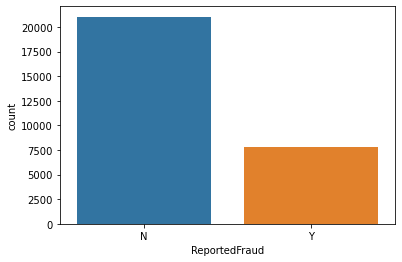

In [69]:
sns.countplot(x="ReportedFraud", data=Final_df)

plt.show()

In [30]:
num_cols = list(Final_df.select_dtypes(include='int').columns)
cat_cols = list(Final_df.select_dtypes(exclude='int').columns)

In [31]:
num_cols

['IncidentTime',
 'NumberOfVehicles',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'VehicleYOM',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod']

In [32]:
cat_cols

['DateOfIncident',
 'TypeOfIncident',
 'SeverityOfIncident',
 'IncidentState',
 'IncidentCity',
 'IncidentAddress',
 'PropertyDamage',
 'AmountOfTotalClaim',
 'VehicleID',
 'DateOfPolicyCoverage',
 'InsurancePolicyState',
 'ReportedFraud']

# Boxplot

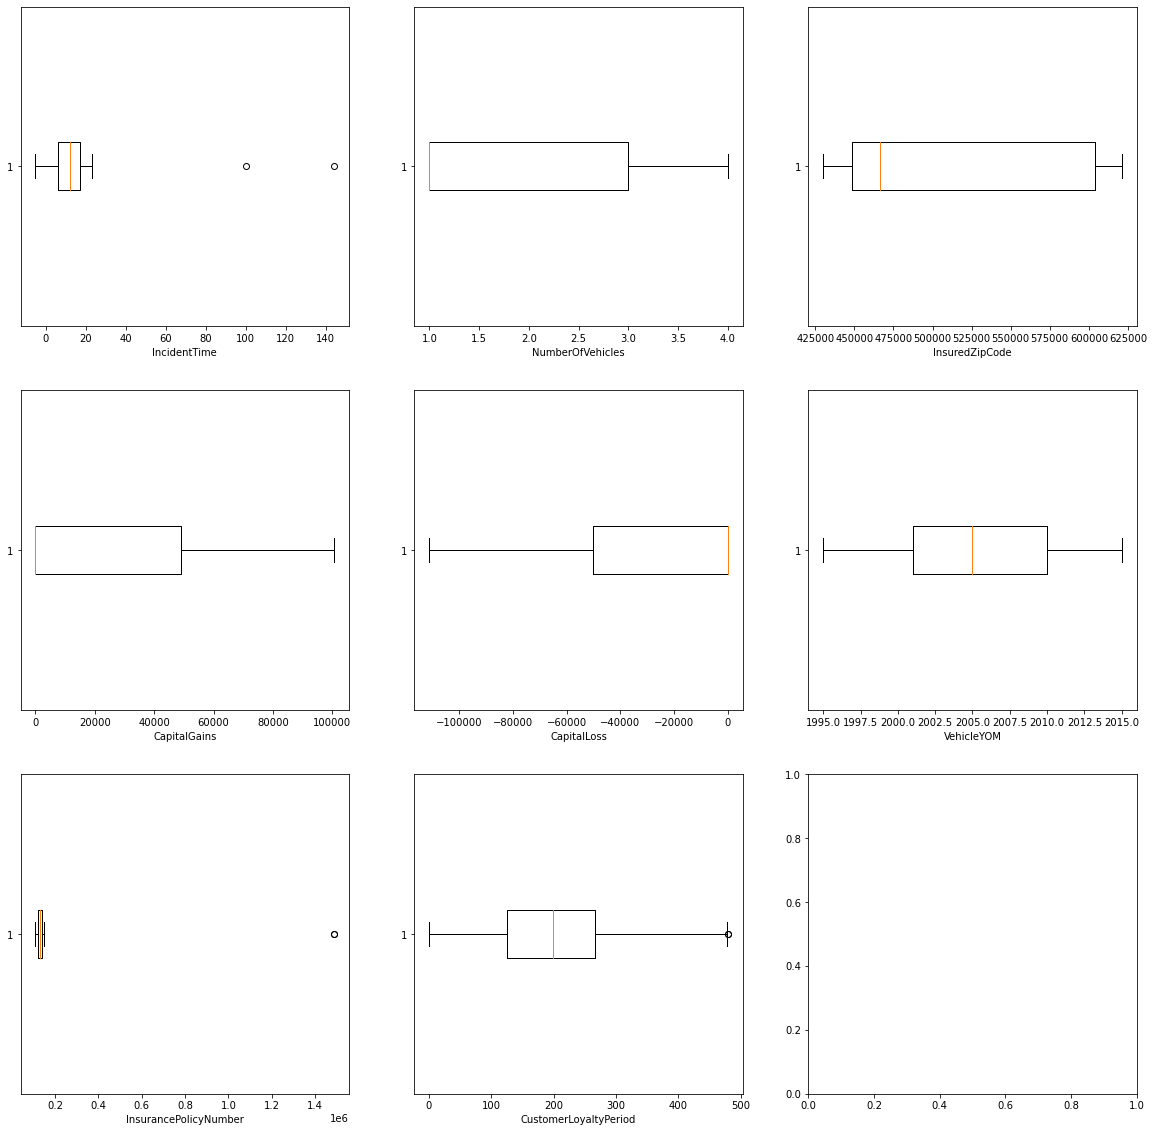

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(Final_df[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

# Remove Outliers

In [34]:
# Calculate the upper and lower whiskers for each column
Q1 = Final_df[num_cols].quantile(0.25)
Q3 = Final_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

# Remove the outliers for each column using the upper and lower whiskers
for col in num_cols:
    Final_df = Final_df[(Final_df[col] >= lower_whisker[col]) & (Final_df[col] <= upper_whisker[col])]

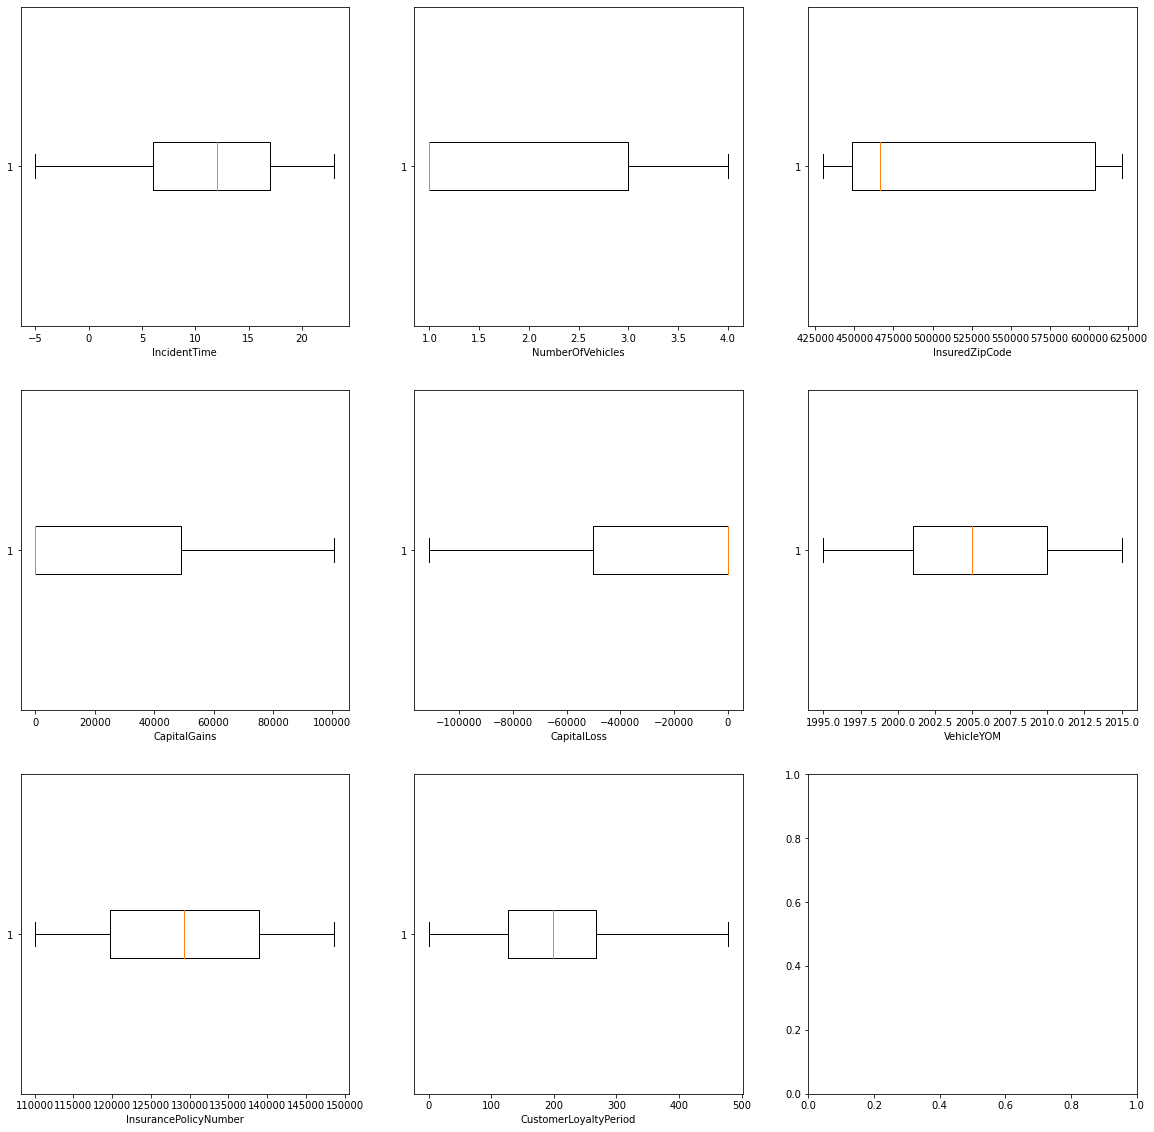

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, column in enumerate(num_cols):
    row = i // 3
    col = i % 3
    if row < 5:
        ax = axes[row][col]
        ax.boxplot(Final_df[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

In [36]:
Final_df.isnull().sum()

DateOfIncident               0
TypeOfIncident               0
SeverityOfIncident           0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                 0
NumberOfVehicles             0
PropertyDamage           10455
AmountOfTotalClaim          50
InsuredZipCode               0
CapitalGains                 0
CapitalLoss                  0
VehicleID                    0
VehicleYOM                   0
InsurancePolicyNumber        0
CustomerLoyaltyPeriod        0
DateOfPolicyCoverage         0
InsurancePolicyState         0
ReportedFraud                0
dtype: int64

# Fill Null Values

In [37]:
Final_df['PropertyDamage'] = Final_df['PropertyDamage'].fillna(Final_df['PropertyDamage'].mode()[0])

In [38]:
Final_df['AmountOfTotalClaim'] = Final_df['AmountOfTotalClaim'].fillna(Final_df['AmountOfTotalClaim'].mean())

In [39]:
Final_df.isnull().sum()

DateOfIncident           0
TypeOfIncident           0
SeverityOfIncident       0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
AmountOfTotalClaim       0
InsuredZipCode           0
CapitalGains             0
CapitalLoss              0
VehicleID                0
VehicleYOM               0
InsurancePolicyNumber    0
CustomerLoyaltyPeriod    0
DateOfPolicyCoverage     0
InsurancePolicyState     0
ReportedFraud            0
dtype: int64

In [40]:
Final_df['AmountOfTotalClaim'] = Final_df['AmountOfTotalClaim'].astype('int')

In [41]:
Final_df.loc[Final_df['DateOfIncident']=='2/3/2015']


,DateOfIncident,TypeOfIncident,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,AmountOfTotalClaim,InsuredZipCode,CapitalGains,CapitalLoss,VehicleID,VehicleYOM,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,ReportedFraud
0,2/3/2015,Multi-vehicle Collision,Total Loss,State7,City1,Location 1311,17,3,NO,65501,454776,56700,-48500,Vehicle26917,2008,119121,49,10/25/1998,State1,N
98,2/3/2015,Single Vehicle Collision,Total Loss,State9,City1,Location 1824,4,1,YES,47365,445601,0,0,Vehicle4618,2012,119241,211,9/22/1994,State1,N
99,2/3/2015,Single Vehicle Collision,Total Loss,State9,City1,Location 1824,4,1,YES,46366,445601,44900,0,Vehicle21925,2012,119242,211,9/21/1995,State1,N
336,2/3/2015,Single Vehicle Collision,Minor Damage,State5,City7,Location 1486,14,1,NO,65055,463356,0,0,Vehicle36053,1998,119525,434,8/20/1994,State1,N
591,2/3/2015,Single Vehicle Collision,Total Loss,State7,City1,Location 1847,6,1,NO,88459,608963,0,-60000,Vehicle20479,2003,119838,181,6/15/2007,State2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28572,2/3/2015,Single Vehicle Collision,Total Loss,State7,City6,Location 1584,11,1,NO,71316,465376,0,0,Vehicle32793,2008,118775,222,3/3/2010,State3,Y
28604,2/3/2015,Multi-vehicle Collision,Minor Damage,State7,City7,Location 1853,16,3,NO,72933,430621,46300,-61400,Vehicle20389,2004,118815,302,5/15/2007,State1,N
28672,2/3/2015,Vehicle Theft,Minor Damage,State8,City3,Location 1198,18,1,YES,4257,478868,42900,-90200,Vehicle29843,2010,118898,107,4/4/1995,State3,N
28783,2/3/2015,Vehicle Theft,Trivial Damage,State7,City2,Location 1271,13,1,NO,7589,458470,0,0,Vehicle10633,2007,119051,265,8/7/2007,State1,Y


In [42]:
from datetime import datetime

# convert the DateOfIncident column to string
Final_df['DateOfIncident'] = Final_df['DateOfIncident'].astype(str)

Final_df['DateOfIncident'] = Final_df['DateOfIncident'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))


# apply strptime() to each string in the DateOfIncident column
Final_df['DateOfIncident'] = Final_df['DateOfIncident'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the month and day values from the datetime objects in the DateOfIncident column
Final_df['DateOfIncident_Month'] = Final_df['DateOfIncident'].apply(lambda x: x.month)
Final_df['DateOfIncident_Day'] = Final_df['DateOfIncident'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
Final_df.head()


,DateOfIncident,TypeOfIncident,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,AmountOfTotalClaim,...,CapitalLoss,VehicleID,VehicleYOM,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,ReportedFraud,DateOfIncident_Month,DateOfIncident_Day
0,2015-02-03,Multi-vehicle Collision,Total Loss,State7,City1,Location 1311,17,3,NO,65501,...,-48500,Vehicle26917,2008,119121,49,10/25/1998,State1,N,2,3
1,2015-02-02,Multi-vehicle Collision,Total Loss,State7,City5,Location 1311,10,3,YES,61382,...,-48500,Vehicle15893,2006,119122,114,11/15/2000,State1,N,2,2
2,2015-01-15,Single Vehicle Collision,Minor Damage,State8,City6,Location 2081,22,1,YES,66755,...,-63700,Vehicle5152,1999,119123,167,2/12/2001,State3,N,1,15
3,2015-01-19,Single Vehicle Collision,Minor Damage,State9,City6,Location 2081,22,1,YES,66243,...,-73400,Vehicle37363,2003,119124,190,4/11/2005,State2,N,1,19
4,2015-01-09,Single Vehicle Collision,Minor Damage,State8,City6,Location 1695,10,1,NO,53544,...,-41500,Vehicle28633,2010,119125,115,10/25/1996,State2,N,1,9


In [43]:
# convert the DateOfIncident column to string
Final_df['DateOfPolicyCoverage'] = Final_df['DateOfPolicyCoverage'].astype(str)

Final_df['DateOfPolicyCoverage'] = Final_df['DateOfPolicyCoverage'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))


# apply strptime() to each string in the DateOfIncident column
Final_df['DateOfPolicyCoverage'] = Final_df['DateOfPolicyCoverage'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# extract the month and day values from the datetime objects in the DateOfIncident column
Final_df['DateOfPolicyCoverage_Month'] = Final_df['DateOfPolicyCoverage'].apply(lambda x: x.month)
Final_df['DateOfPolicyCoverage_Day'] = Final_df['DateOfPolicyCoverage'].apply(lambda x: x.day)
Final_df['DateOfPolicyCoverage_year'] = Final_df['DateOfPolicyCoverage'].apply(lambda x: x.year)

# print the first 5 rows of the final dataframe to verify the changes
Final_df.head()


,DateOfIncident,TypeOfIncident,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,AmountOfTotalClaim,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,ReportedFraud,DateOfIncident_Month,DateOfIncident_Day,DateOfPolicyCoverage_Month,DateOfPolicyCoverage_Day,DateOfPolicyCoverage_year
0,2015-02-03,Multi-vehicle Collision,Total Loss,State7,City1,Location 1311,17,3,NO,65501,...,119121,49,1998-10-25,State1,N,2,3,10,25,1998
1,2015-02-02,Multi-vehicle Collision,Total Loss,State7,City5,Location 1311,10,3,YES,61382,...,119122,114,2000-11-15,State1,N,2,2,11,15,2000
2,2015-01-15,Single Vehicle Collision,Minor Damage,State8,City6,Location 2081,22,1,YES,66755,...,119123,167,2001-02-12,State3,N,1,15,2,12,2001
3,2015-01-19,Single Vehicle Collision,Minor Damage,State9,City6,Location 2081,22,1,YES,66243,...,119124,190,2005-04-11,State2,N,1,19,4,11,2005
4,2015-01-09,Single Vehicle Collision,Minor Damage,State8,City6,Location 1695,10,1,NO,53544,...,119125,115,1996-10-25,State2,N,1,9,10,25,1996


In [44]:
Final_df1 = Final_df.drop(['DateOfIncident','DateOfPolicyCoverage'], axis=1)

In [45]:
Final_df1.shape

(28830, 23)

In [46]:
num_cols = list(Final_df1.select_dtypes(include='int').columns)
cat_cols = list(Final_df1.select_dtypes(exclude='int').columns)

In [47]:
num_cols

['IncidentTime',
 'NumberOfVehicles',
 'AmountOfTotalClaim',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'VehicleYOM',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'DateOfIncident_Month',
 'DateOfIncident_Day',
 'DateOfPolicyCoverage_Month',
 'DateOfPolicyCoverage_Day',
 'DateOfPolicyCoverage_year']

In [48]:
cat_cols

['TypeOfIncident',
 'SeverityOfIncident',
 'IncidentState',
 'IncidentCity',
 'IncidentAddress',
 'PropertyDamage',
 'VehicleID',
 'InsurancePolicyState',
 'ReportedFraud']

# Encoding  Categorical Columns

In [49]:
# select columns to encode
cols_to_encode = ['TypeOfIncident', 'PropertyDamage','ReportedFraud']

# perform one-hot encoding
Final_df1 = pd.get_dummies(Final_df1, columns=cols_to_encode)

In [50]:
Final_df1.head()

,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,AmountOfTotalClaim,InsuredZipCode,CapitalGains,CapitalLoss,...,DateOfPolicyCoverage_Day,DateOfPolicyCoverage_year,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,PropertyDamage_NO,PropertyDamage_YES,ReportedFraud_N,ReportedFraud_Y
0,Total Loss,State7,City1,Location 1311,17,3,65501,454776,56700,-48500,...,25,1998,1,0,0,0,1,0,1,0
1,Total Loss,State7,City5,Location 1311,10,3,61382,454776,70600,-48500,...,15,2000,1,0,0,0,0,1,1,0
2,Minor Damage,State8,City6,Location 2081,22,1,66755,603260,66400,-63700,...,12,2001,0,0,1,0,0,1,1,0
3,Minor Damage,State9,City6,Location 2081,22,1,66243,474848,47900,-73400,...,11,2005,0,0,1,0,0,1,1,0
4,Minor Damage,State8,City6,Location 1695,10,1,53544,457942,0,-41500,...,25,1996,0,0,1,0,1,0,1,0


In [51]:
Final_df1.columns

Index(['SeverityOfIncident', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'AmountOfTotalClaim', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'VehicleID', 'VehicleYOM', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState', 'DateOfIncident_Month',
       'DateOfIncident_Day', 'DateOfPolicyCoverage_Month',
       'DateOfPolicyCoverage_Day', 'DateOfPolicyCoverage_year',
       'TypeOfIncident_Multi-vehicle Collision', 'TypeOfIncident_Parked Car',
       'TypeOfIncident_Single Vehicle Collision',
       'TypeOfIncident_Vehicle Theft', 'PropertyDamage_NO',
       'PropertyDamage_YES', 'ReportedFraud_N', 'ReportedFraud_Y'],
      dtype='object')

In [52]:
Final_df1 = Final_df1.drop(['TypeOfIncident_Multi-vehicle Collision','PropertyDamage_NO','ReportedFraud_N'], axis = 1)

In [53]:
# Create a list of categorical columns to be encoded
ordinal_cat_cols = ['SeverityOfIncident', 'IncidentCity','IncidentState','IncidentAddress', 'InsurancePolicyState','VehicleID']

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder on the categorical columns
encoder.fit(Final_df1[ordinal_cat_cols])

# Transform the categorical columns to ordinal encoding
Final_df1[ordinal_cat_cols] = encoder.transform(Final_df1[ordinal_cat_cols])


In [54]:
Final_df1.head()

,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,AmountOfTotalClaim,InsuredZipCode,CapitalGains,CapitalLoss,...,DateOfIncident_Month,DateOfIncident_Day,DateOfPolicyCoverage_Month,DateOfPolicyCoverage_Day,DateOfPolicyCoverage_year,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,PropertyDamage_YES,ReportedFraud_Y
0,2.0,4.0,0.0,279.0,17,3,65501,454776,56700,-48500,...,2,3,10,25,1998,0,0,0,0,0
1,2.0,4.0,4.0,279.0,10,3,61382,454776,70600,-48500,...,2,2,11,15,2000,0,0,0,1,0
2,1.0,5.0,5.0,980.0,22,1,66755,603260,66400,-63700,...,1,15,2,12,2001,0,1,0,1,0
3,1.0,6.0,5.0,980.0,22,1,66243,474848,47900,-73400,...,1,19,4,11,2005,0,1,0,1,0
4,1.0,5.0,5.0,624.0,10,1,53544,457942,0,-41500,...,1,9,10,25,1996,0,1,0,0,0


In [60]:
Final_df1.corr()

,SeverityOfIncident,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,AmountOfTotalClaim,InsuredZipCode,CapitalGains,CapitalLoss,...,DateOfIncident_Month,DateOfIncident_Day,DateOfPolicyCoverage_Month,DateOfPolicyCoverage_Day,DateOfPolicyCoverage_year,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,PropertyDamage_YES,ReportedFraud_Y
SeverityOfIncident,1.000000,0.053537,-0.017947,0.025168,-0.078063,-0.175617,-0.358091,0.000811,-0.022501,-0.011879,...,0.008476,0.013639,-0.000924,-0.074431,0.002899,0.261440,-0.136966,0.262553,-0.040273,-0.348794
IncidentState,0.053537,1.000000,0.008029,0.038878,-0.034595,-0.061748,-0.046943,-0.023537,0.012440,-0.040206,...,-0.023682,0.029867,-0.051665,0.010603,-0.029547,0.034920,0.001226,0.055709,-0.031404,-0.063384
IncidentCity,-0.017947,0.008029,1.000000,0.003444,0.017419,-0.026548,0.025725,-0.006252,-0.009180,-0.046421,...,0.018543,-0.041850,0.021370,0.036928,-0.015011,-0.021053,0.015099,0.022874,0.003662,-0.036741
IncidentAddress,0.025168,0.038878,0.003444,1.000000,-0.023186,-0.040386,-0.061277,0.037218,-0.027553,-0.037102,...,-0.052263,0.064289,-0.014976,-0.007736,-0.028255,0.040249,-0.034166,0.074989,0.004943,-0.015371
IncidentTime,-0.078063,-0.034595,0.017419,-0.023186,1.000000,0.174713,0.272259,0.005867,-0.012873,-0.018087,...,-0.011644,-0.021116,0.015537,-0.006743,0.048197,-0.200660,0.054570,-0.212521,0.055954,0.009348
NumberOfVehicles,-0.175617,-0.061748,-0.026548,-0.040386,0.174713,1.000000,0.291070,0.015117,0.057907,-0.002608,...,0.047910,-0.008969,-0.021062,0.008213,0.041489,-0.254705,-0.586396,-0.265230,-0.024019,0.041821
AmountOfTotalClaim,-0.358091,-0.046943,0.025725,-0.061277,0.272259,0.291070,1.000000,-0.021444,0.012459,-0.014006,...,-0.019583,-0.037873,0.011657,0.000239,0.010164,-0.567404,0.372548,-0.587720,0.061263,0.155737
InsuredZipCode,0.000811,-0.023537,-0.006252,0.037218,0.005867,0.015117,-0.021444,1.000000,-0.013741,0.029400,...,-0.024101,0.021034,0.027246,-0.033760,-0.020692,0.023967,-0.040274,0.035098,0.019432,0.019564
CapitalGains,-0.022501,0.012440,-0.009180,-0.027553,-0.012873,0.057907,0.012459,-0.013741,1.000000,-0.049959,...,-0.016906,0.022043,0.026846,-0.001491,0.042222,-0.017555,-0.027295,-0.023926,-0.019139,-0.001338
CapitalLoss,-0.011879,-0.040206,-0.046421,-0.037102,-0.018087,-0.002608,-0.014006,0.029400,-0.049959,1.000000,...,0.016174,-0.013271,-0.006409,-0.021494,-0.048652,-0.009536,-0.001566,0.015531,0.017736,-0.013978


<AxesSubplot:>

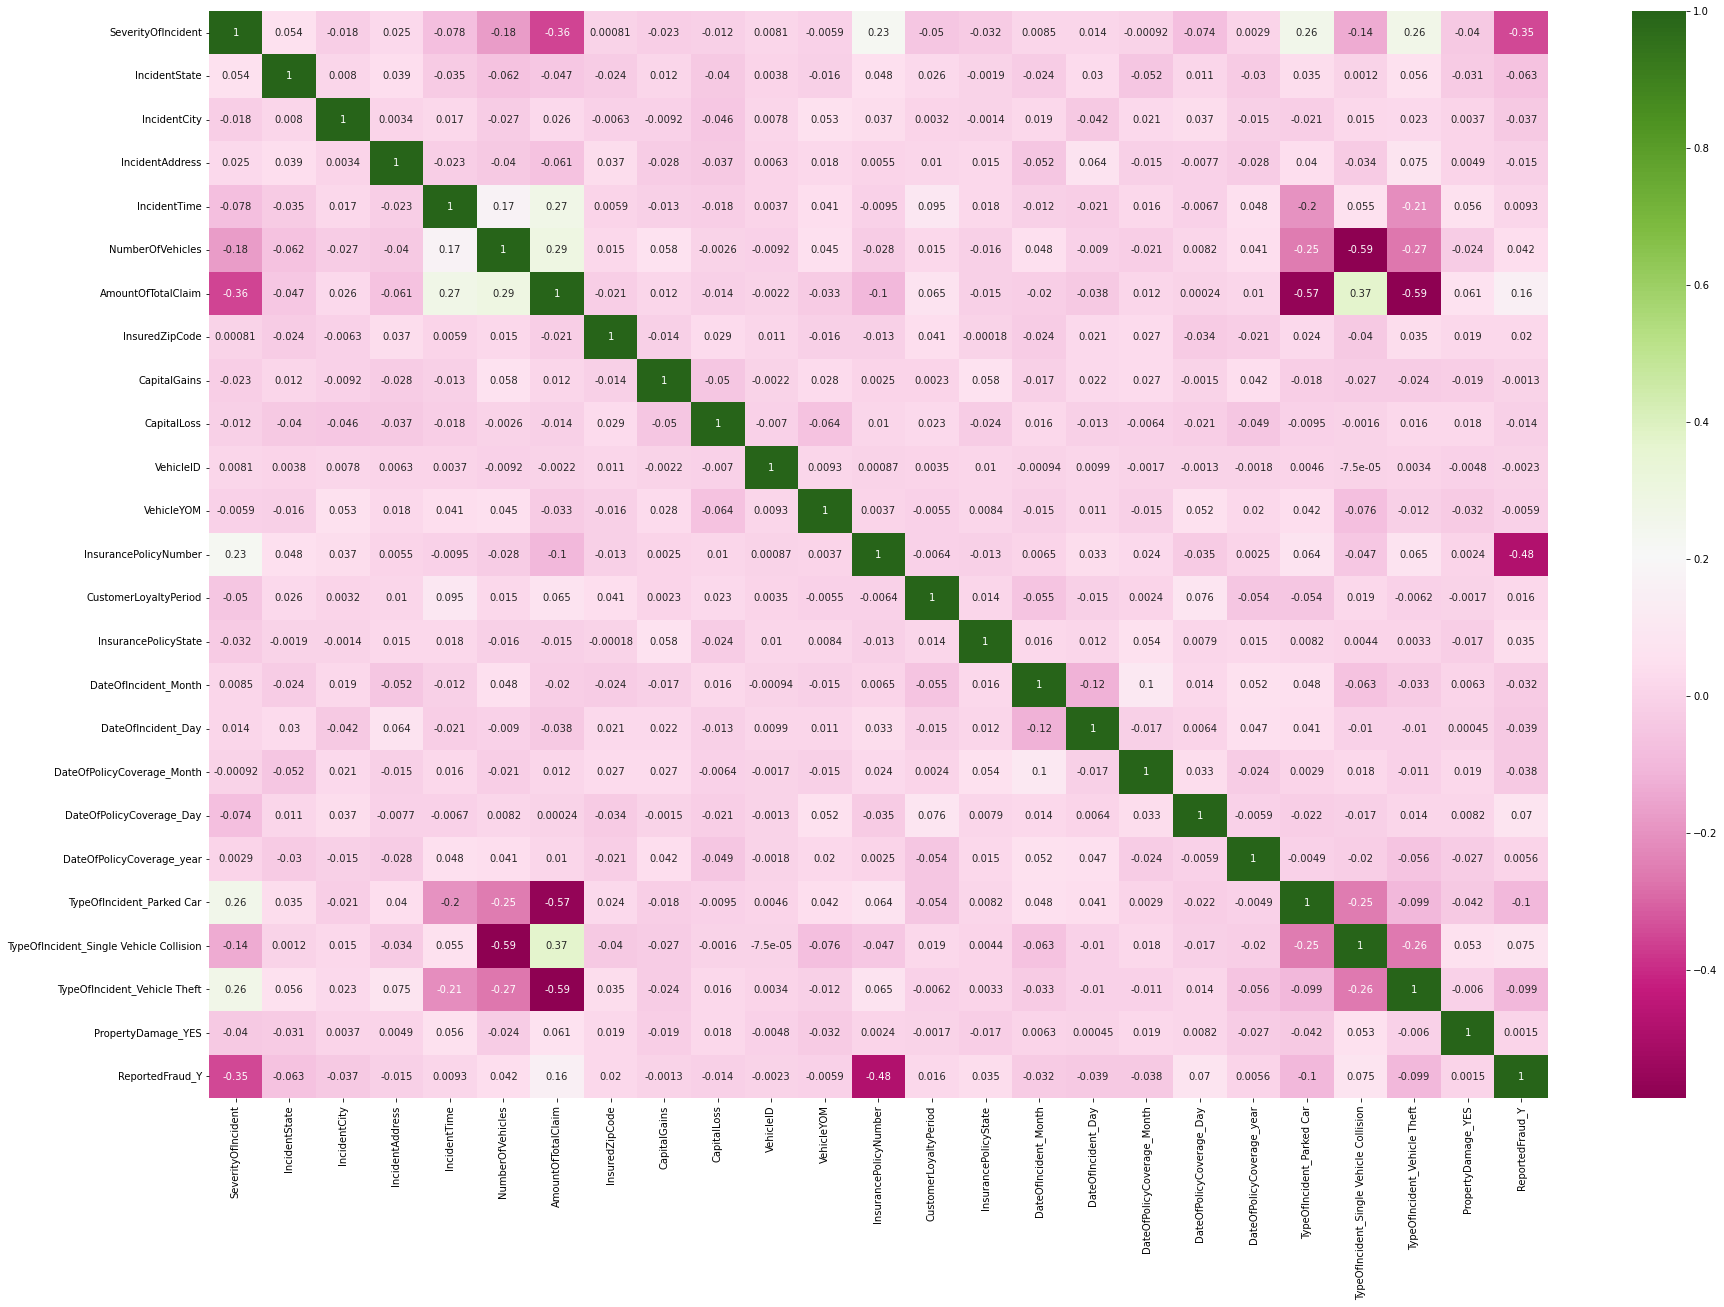

In [68]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(Final_df1.corr(), annot=True, cmap='PiYG')

In [61]:
X = Final_df1.drop(['ReportedFraud_Y'], axis=1)
y = Final_df1['ReportedFraud_Y']

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [63]:
X.shape

(28830, 24)

In [66]:
print(X)

[[0.66666667 0.66666667 0.         ... 0.         0.         0.        ]
 [0.66666667 0.66666667 0.66666667 ... 0.         0.         1.        ]
 [0.33333333 0.83333333 0.83333333 ... 1.         0.         1.        ]
 ...
 [0.33333333 1.         1.         ... 1.         0.         1.        ]
 [0.33333333 1.         0.33333333 ... 1.         0.         0.        ]
 [0.66666667 0.83333333 0.33333333 ... 1.         0.         0.        ]]
